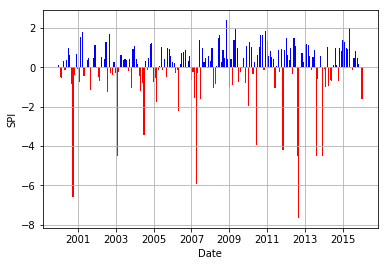

[  1.18975382e-01  -4.66705743e-01  -5.41412572e-01   3.27437611e-01
  -1.59606406e-01   3.92882721e-01   9.66289510e-01   6.05484707e-01
  -8.38894693e-01  -6.58627256e+00  -4.03387272e-01   6.78051873e-01
  -7.37866152e-02  -7.25184334e-01   1.52845175e+00   1.78434894e+00
  -4.59776051e-01   3.98776770e-03   3.75129981e-01   4.84238855e-01
  -1.13873677e+00   1.44577623e-02   4.94483163e-01   1.15053958e+00
  -4.92599560e-02  -4.90804471e-01  -7.12557396e-01   5.45127819e-01
   2.19997003e-02   4.08849018e-01   1.30702090e+00  -1.26321455e+00
   1.69220891e+00  -2.85865224e-01  -3.98323366e-01   2.53958091e-01
  -2.86439785e-01  -4.48970873e+00  -2.40212812e-01   6.45543819e-01
   6.13910264e-01   3.64628916e-01   4.24025722e-01   3.98207678e-01
  -1.92563122e-01   4.14790626e-01  -1.02838650e+00   9.41640817e-01
   1.09816876e+00   4.00914494e-01   1.47978472e-01  -4.64783997e-01
  -1.22459595e+00  -7.72337390e-01  -3.43311129e+00   3.02723136e-01
  -1.44384982e-01   4.84616612e-01

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import os
import scipy.stats

import sys
sys.path.append('/home/599/rg6346/standard_precip/')
import standard_precip
from standard_precip.plot_index import plot_index
from standard_precip.spi import SPI 

def create_datelist(start_date, n_months):
    
    dates = [start_date + relativedelta(months=i) 
              for i in range(0, n_months)]
    
    return np.array(dates)


if __name__=='__main__':
    # Read precip data from csv
    crnt_path = os.path.dirname(os.path.abspath('/home/599/rg6346/standard_precip/'))
    precip_file = os.path.join(crnt_path,'standard_precip','data','rainfall_test.csv')
    rainfall_data = np.genfromtxt(precip_file, delimiter=',')
    
    # Initialize SPI class
    spi = SPI() 
    
    # Set rolling window parameters
    spi.set_rolling_window_params(
        span=1, window_type=None, center=True
    )
    
    # Set distribution parameters
    spi.set_distribution_params(dist_type='gengamma')
    
    # Calculate SPI
    data = spi.calculate(rainfall_data, starting_month=1)
    
    # Create date list for plotting
    n_dates = np.shape(data)[0]
    date_list = create_datelist(dt.date(2000,1,1), n_dates)
    
    # Plot SPI
    plot_index(date_list, data)
    print (np.squeeze(data))

    
    

In [8]:
# Test find best distribution fit
    dist_list = ['gamma', 'gengamma', 'fisk', 'dweibull', 'logistic']
    
    test_data = scipy.stats.gamma.rvs(10., size=100)
    sse = spi.best_fit_distribution(test_data, dist_list, bins=20, 
                                    save_file='test.jpg')
    
    for k in sse:
        print ("distribution = {0:}; SSE = {1:}".format(k, sse[k]))

IndentationError: unexpected indent (<ipython-input-8-cb4283e0b346>, line 2)